<a href="https://colab.research.google.com/github/Kaushal-Top5699/classification_NN_tensorflow/blob/main/classification_NN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow.**
Introduction to Neural Network Classification with **TensorFlow**. In a classification problem you try to classify something as one thing or another.

A few types,
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

In [1]:
# Creating sample/toy data.
from sklearn.datasets import make_circles
# Make 1000 exmaples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Lets visualise the data.
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


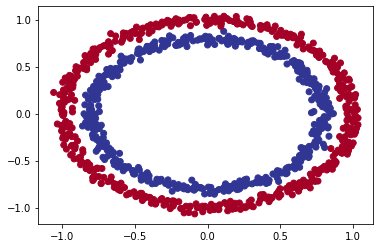

In [5]:
# Visualise with a plot.
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

### **Input and output shapes.**

In [6]:
# Checking the shapes of features and labels.
X.shape, y.shape
# y is scalar therefore, no dimension output here.

((1000, 2), (1000,))

In [7]:
# How many samples we are working with.
len(X), len(y)

(1000, 1000)

In [8]:
# View 1st example features and label.
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### **Building a Model**

In [9]:
import tensorflow as tf

# Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [10]:
model_1.fit(X, y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 5.5262 - accuracy: 0.4760
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 4.2939 - accuracy: 0.4700
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 3.0835 - accuracy: 0.4910
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.5140
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.4990
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4950
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5020
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4850
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4950


In [11]:
# To improve our model, lets run it for longer.
model_1.fit(X, y, epochs = 200, verbose = 0)

In [12]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

We got an accuracy of just 50%, therefore, let's add an extra layer and up notch the things.

In [13]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [14]:
model_2.fit(X, y, epochs = 10, verbose = 0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5080


[0.6955934166908264, 0.5080000162124634]

Looks like we just got an increment by 1. Lets try ruuning it for more epochs.

In [16]:
model_2.fit(X, y, epochs = 100, verbose = 0)

In [17]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932671070098877, 0.5]

### To improve our model we need make some changes namely, adding extra layers, neurons or changing the optimizer.

In [ ]:
# Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X, y, epochs = 100)

In [37]:
model_3.evaluate(X, y) 

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932182908058167, 0.5]

In [ ]:
model_3.predict(X)

Now since, we are still getting the same result even after improving our model, its a good idea to visualize the model.

1. Function that takes in trained model's (X) features and (y) labels.
2. Create meshgrid of different X values.
3. Make predictions across meshgrid.
4. Plot the predictions as well as line between zeros(where each unique class falls).


In [39]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the aixs boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X values.
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
   
  # Make predictions.
  y_pred = model.predict(x_in)

  # Check for multi-class.
  if len(y_pred[0] > 1):
    print("Multi-Class Classification")
    # If so we have to reshape predictions for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary.
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Multi-Class Classification


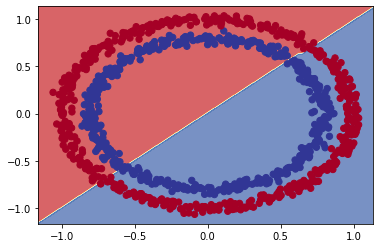

In [40]:
plot_decision_boundary(model_3, X = X, y = y)